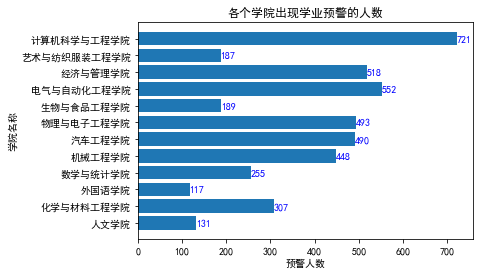

In [3]:
#导入库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#设置显示中文字体
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
#要求：各个学院出现学业预警的人数：
#直方图：x轴是各个学院，y轴是每个学院有学院预警的人数

#读取数据
data=pd.read_csv('1.csv',encoding='gbk',index_col=0)
#data#发现读取后自动加上行索引0，1，2，...

#数据清洗,去除空值和去除重复值
data=data.dropna(axis=0,how='any').drop_duplicates()

#按学生学院进行分组
data_group=data.groupby('学生学院')

data_y=data_group.size()
#print(data_y)
data_x=data_y.index
#data_x

plt.figure()
plt.barh(data_x,data_y)
plt.xlabel('预警人数')
plt.ylabel('学院名称')
plt.title('各个学院出现学业预警的人数')

for i, v in enumerate(data_y):
    plt.text(v, i-.2, str(v), color='blue', fontweight='bold')
#plt.text()
plt.show()

#plt.figure()
#plt.bar(data_x,data_y)
#plt.xticks(rotation=-30)    # 设置x轴标签旋转角度
#plt.show()

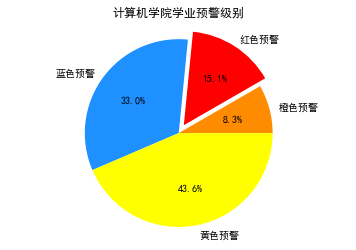

In [5]:
#计算机学院学业预警（蓝色，黄色，橙色，红色）的人数占比：
#饼图：
group=data.groupby(by='学生学院')

data_jsj=group.get_group('计算机科学与工程学院')
jsj_group=data_jsj.groupby(by='预警级别')

data2_y=jsj_group.size()
#print(data2_y)
data2_x=data2_y.index
#print(data2_x)
#print(data_jsj['预警级别'])

#print(data.loc(:,['计算机科学与工程学院']))
#print(data.loc(:,'班级'))

#print(data_y['计算机科学与工程学院'])
explode=(0,0.1,0,0)
plt.pie(data2_y,labels=data2_x,explode=explode,autopct='%1.1f%%',shadow=False,colors=('darkorange','r', 'dodgerblue', 'yellow'))
plt.axis('equal')
plt.title('计算机学院学业预警级别')
plt.show()

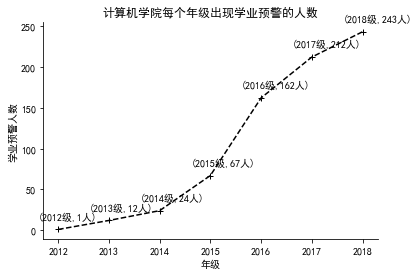

In [42]:
#计算机学院每个年级出现学业预警的人数
#折线图：

data_jsj=group.get_group('计算机科学与工程学院')
jsj_group3=data_jsj.groupby(by='年级')

data3_y=jsj_group3.size()
#print(data3_y)
data3_x=data3_y.index
#print(data3_x)

plt.figure()
plt.plot(data3_x,data3_y,linestyle='--',marker='+',color='k')
for a,b in zip(data3_x,data3_y):
    plt.annotate('(%s级,%s人)'%(a,b),xy=(a,b),xytext=(-20,10),
                 textcoords='offset points',color='k')
plt.xlabel('年级')
plt.ylabel('学业预警人数')
plt.title('计算机学院每个年级出现学业预警的人数')
#gca=get current axis获取当前的坐标轴
ax=plt.gca()
ax.spines['right'].set_color('none')#设置右边的轴消失，.spines[]是坐标轴上下左右的框
ax.spines['top'].set_color('none')#设置上面的轴消失
#plt.legend()
plt.show()

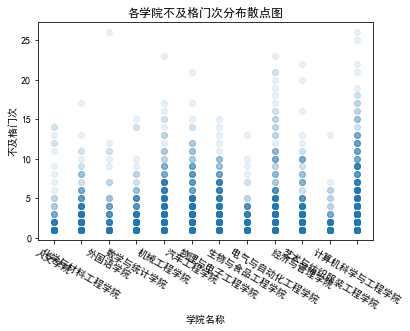

In [43]:
#各个学院，各个预警等级  
#散点图
#print(data)
#print(data[1:2])
data4_y=data['不及格门次']
#data4_y=data['年级']
data4_x=data.index
#data4_x=np.arange(0,4408)
plt.figure()
plt.scatter(data4_x,data4_y,alpha=0.1)
plt.xticks(rotation=-30)    # 设置x轴标签旋转角度
plt.xlabel('学院名称')
plt.ylabel('不及格门次')
plt.title('各学院不及格门次分布散点图')
plt.show()

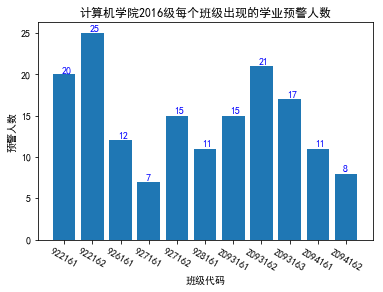

In [10]:
#计算机学院2016级每个班级出现的学业预警人数
group=data.groupby(by='学生学院')
jsj_class=group.get_group('计算机科学与工程学院').groupby(by='年级')
#for i in jsj_class:
   # print(i)
jsj_class=jsj_class.get_group(2016).groupby(by='班级')
data5_y=jsj_class.size()
data5_x=data5_y.index

plt.figure()
plt.bar(data5_x,data5_y)
for i, v in enumerate(data5_y):
    plt.text(i-.1, v+.2, str(v), color='blue', fontweight='bold')
plt.xticks(rotation=-30)    # 设置x轴标签旋转角度
plt.xlabel('班级代码')
plt.ylabel('预警人数')
plt.title('计算机学院2016级每个班级出现的学业预警人数')
plt.show()

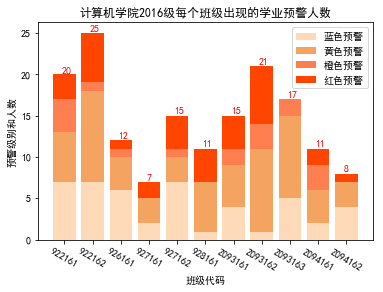

In [48]:
#计算机学院2016级每个班级出现的学业预警人数
group=data.groupby(by='学生学院')
jsj_class=group.get_group('计算机科学与工程学院').groupby(by='年级')
#for i in jsj_class:
   # print(i)
#jsj_class=jsj_class.get_group(2016).groupby(by='班级').apply(lambda x: x.sort_values('预警级别', ascending=False))
jsj_class=jsj_class.get_group(2016).groupby(by='预警级别')
#蓝，黄，橙，红
class1=jsj_class.get_group('蓝色预警')
group1=class1.groupby('班级')
group1_y=group1.size()
#print(group1_y)

class2=jsj_class.get_group('黄色预警')
group2=class2.groupby('班级')
group2_y=group2.size()
#print(group2_y)

class3=jsj_class.get_group('橙色预警')
group3=class3.groupby('班级')
group3_y=group3.size()
#print(group3_y)
data_init=pd.Series([0]*x.shape[0],index=group1_y.index)

#print(data_init)
group3_y=(group3_y+data_init).fillna(0)
#print(group3_y)
x3=group3_y.index
#print(x3)

class4=jsj_class.get_group('红色预警')
group4=class4.groupby('班级')
group4_y=group4.size()
group4_y=(group4_y+data_init).fillna(0)

x=data5_x
#print(x.shape[0])
#print(group1_y.index)
#init=np.zeros((1,x.shape[0]))

#y=[group1_y,group2_y,group3_y,group4_y]

plt.figure()
colors=['peachpuff','sandybrown','coral','orangered']
plt.bar(x,group1_y,color='peachpuff',label='蓝色预警')
plt.bar(x,group2_y,color='sandybrown',bottom=group1_y,label='黄色预警')
#print(type(group1_y))

plt.bar(x,group3_y,color='coral',bottom=group1_y+group2_y,label='橙色预警')
plt.bar(x,group4_y,color='orangered',bottom=group1_y+group2_y+group3_y,label='红色预警')

#for i, v in enumerate(data5_y):
 #   plt.text(i-.1, v+.2, str(v), color='blue', fontweight='bold')
plt.xticks(rotation=-30)    # 设置x轴标签旋转角度
for i, v in enumerate(data5_y):
    plt.text(i-.1, v+.2, str(v), color='r', fontweight='bold')
plt.xlabel('班级代码')
plt.ylabel('预警级别和人数')
plt.title('计算机学院2016级每个班级出现的学业预警人数')
plt.legend()
plt.show()